In [1]:
import pandas as pd
import numpy as np
import ta

C:\Users\Sally\AppData\Local\Temp\ipykernel_9840\909928169.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r'../data/processed/btcusdt_1dprocessed.csv')
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume
0,2023-02-24,23940.20,24132.35,22841.19,23185.29,343582.57453,2023-02-24 23:59:59.999,8.087524e+09,11531424,170263.13353,4.008150e+09
1,2023-02-25,23184.04,23219.13,22722.00,23157.07,191311.81010,2023-02-25 23:59:59.999,4.406286e+09,9124568,94440.13964,2.175284e+09
2,2023-02-26,23157.07,23689.99,23059.18,23554.85,202323.73623,2023-02-26 23:59:59.999,4.716158e+09,9506015,101003.39278,2.354572e+09
3,2023-02-27,23554.85,23897.99,23106.77,23492.09,283706.08590,2023-02-27 23:59:59.999,6.659786e+09,11754195,141360.04845,3.318354e+09
4,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.99894,2023-02-28 23:59:59.999,6.172931e+09,9568743,131200.82704,3.066250e+09


In [3]:
import sys
sys.path.append('..') #go to project root

from src.Feature_generator import generate_features
df_features = generate_features(df)

In [4]:
df_features.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,macd,macd_signal,macd_diff,bb_high,bb_low,bb_width,volume_ma_7,volume_ratio,high_low_ratio,close_open_ratio
0,2023-02-24,23940.20,24132.35,22841.19,23185.29,343582.57453,2023-02-24 23:59:59.999,8.087524e+09,11531424,170263.13353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056528,-0.031533
1,2023-02-25,23184.04,23219.13,22722.00,23157.07,191311.81010,2023-02-25 23:59:59.999,4.406286e+09,9124568,94440.13964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021879,-0.001163
2,2023-02-26,23157.07,23689.99,23059.18,23554.85,202323.73623,2023-02-26 23:59:59.999,4.716158e+09,9506015,101003.39278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027356,0.017177
3,2023-02-27,23554.85,23897.99,23106.77,23492.09,283706.08590,2023-02-27 23:59:59.999,6.659786e+09,11754195,141360.04845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034242,-0.002664
4,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.99894,2023-02-28 23:59:59.999,6.172931e+09,9568743,131200.82704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025152,-0.014921


In [5]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   int64  
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  return_1d           999 non-null    float64
 12  return_7d           993 non-null    float64
 13  return_30d          970 non-null    float64
 14  volatility_7d       993 non-null    float64
 15  volatility_30d      970 non-null    float64
 16  sma_7  

In [6]:
df_features['macd_signal'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: macd_signal
Non-Null Count  Dtype  
--------------  -----  
967 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


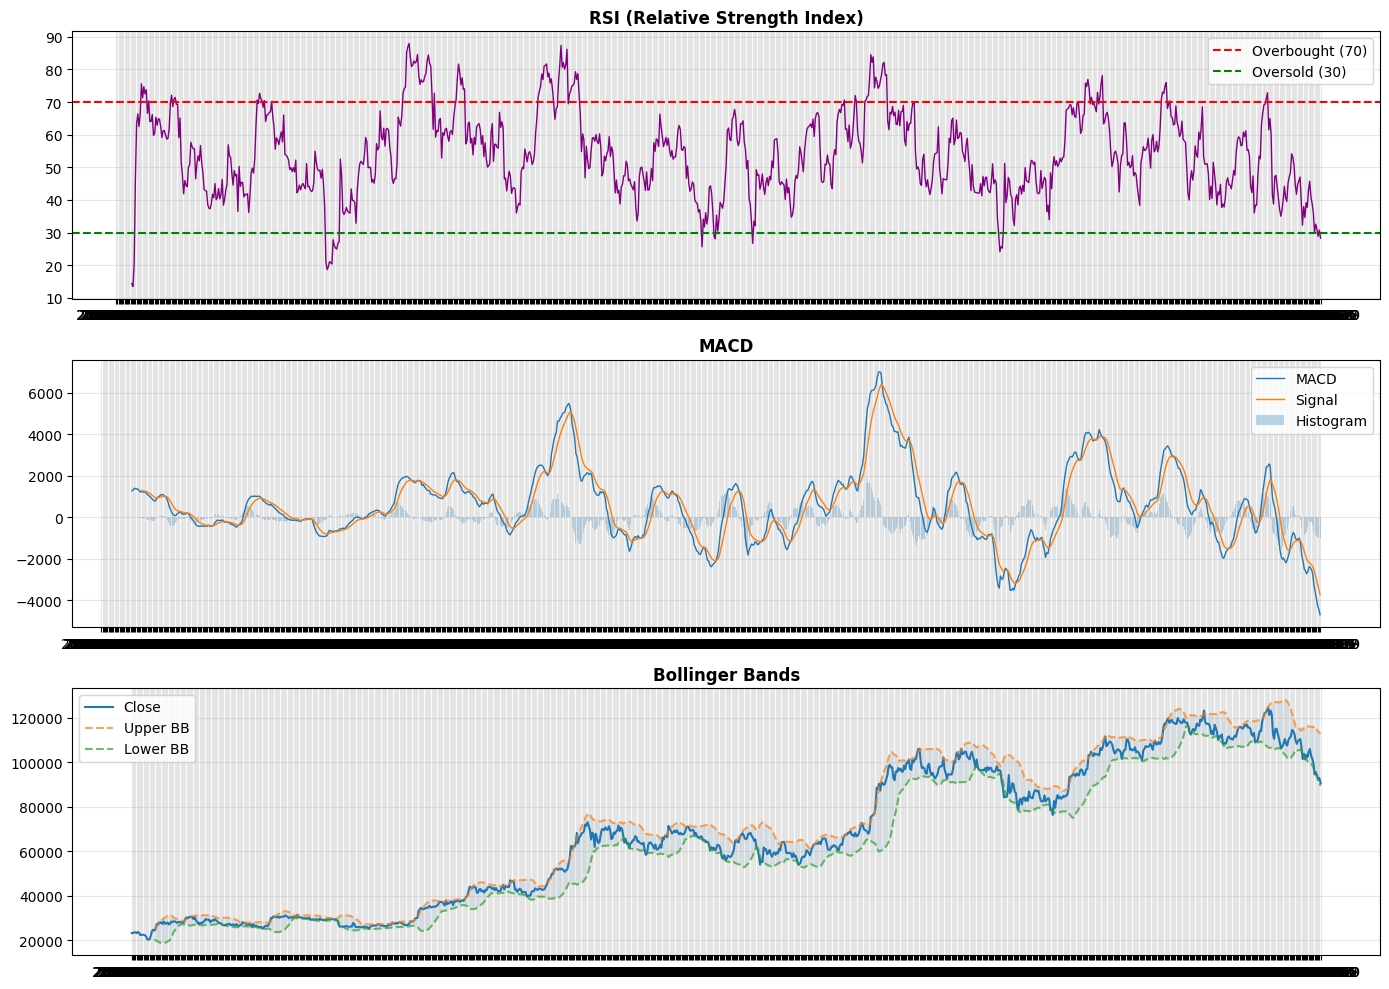

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
 
fig, axes = plt.subplots(3, 1, figsize=(14, 10))
 
# RSI
axes[0].plot(df_features['open_time'], df_features['rsi'], color ='purple', linewidth =1)
axes[0].axhline(y =70, color ='r', linestyle ='--', label ='Overbought (70)')
axes[0].axhline(y =30, color ='g', linestyle ='--', label='Oversold (30)')
axes[0].set_title('RSI (Relative Strength Index)', fontweight ='bold')
axes[0].legend()
axes[0].grid(True, alpha =0.3)
 
# MACD
axes[1].plot(df_features['open_time'], df_features['macd'], label='MACD', linewidth=1)
axes[1].plot(df_features['open_time'], df_features['macd_signal'], label='Signal', linewidth =1)
axes[1].bar(df_features['open_time'], df_features['macd_diff'], label='Histogram', alpha =0.3)
axes[1].set_title('MACD', fontweight ='bold')
axes[1].legend()
axes[1].grid(True, alpha =0.3)
 
# Bollinger Bands
axes[2].plot(df_features['open_time'], df_features['close'], label ='Close', linewidth =1.5)
axes[2].plot(df_features['open_time'], df_features['bb_high'], label ='Upper BB', linestyle ='--', alpha =0.7)
axes[2].plot(df_features['open_time'], df_features['bb_low'], label ='Lower BB', linestyle ='--', alpha =0.7)
axes[2].fill_between(df_features['open_time'], df_features['bb_low'], df_features['bb_high'], alpha =0.1)
axes[2].set_title('Bollinger Bands', fontweight ='bold')
axes[2].legend()
axes[2].grid(True, alpha =0.3)
 
plt.tight_layout()
plt.show()

#### CORRELATION

In [8]:
correlations = df_features.select_dtypes(include='number').corr()
print(correlations)


                        open      high       low     close    volume  \
open                1.000000  0.999249  0.998962  0.998519 -0.306106   
high                0.999249  1.000000  0.998675  0.999369 -0.300184   
low                 0.998962  0.998675  1.000000  0.999195 -0.312386   
close               0.998519  0.999369  0.999195  1.000000 -0.305133   
volume             -0.306106 -0.300184 -0.312386 -0.305133  1.000000   
quote_asset_volume  0.076398  0.089598  0.059354  0.076924  0.815328   
num_trades          0.334912  0.345044  0.318351  0.332546  0.561650   
taker_base_volume  -0.305070 -0.298681 -0.310818 -0.303312  0.999697   
taker_quote_volume  0.064925  0.079300  0.049307  0.067484  0.818768   
return_1d          -0.056967 -0.028453 -0.029207 -0.006917  0.086712   
return_7d          -0.039574 -0.029715 -0.026999 -0.021725  0.165452   
return_30d         -0.020777 -0.013744 -0.015619 -0.010024  0.252999   
volatility_7d      -0.052185 -0.040425 -0.062857 -0.049399  0.31

<Axes: >

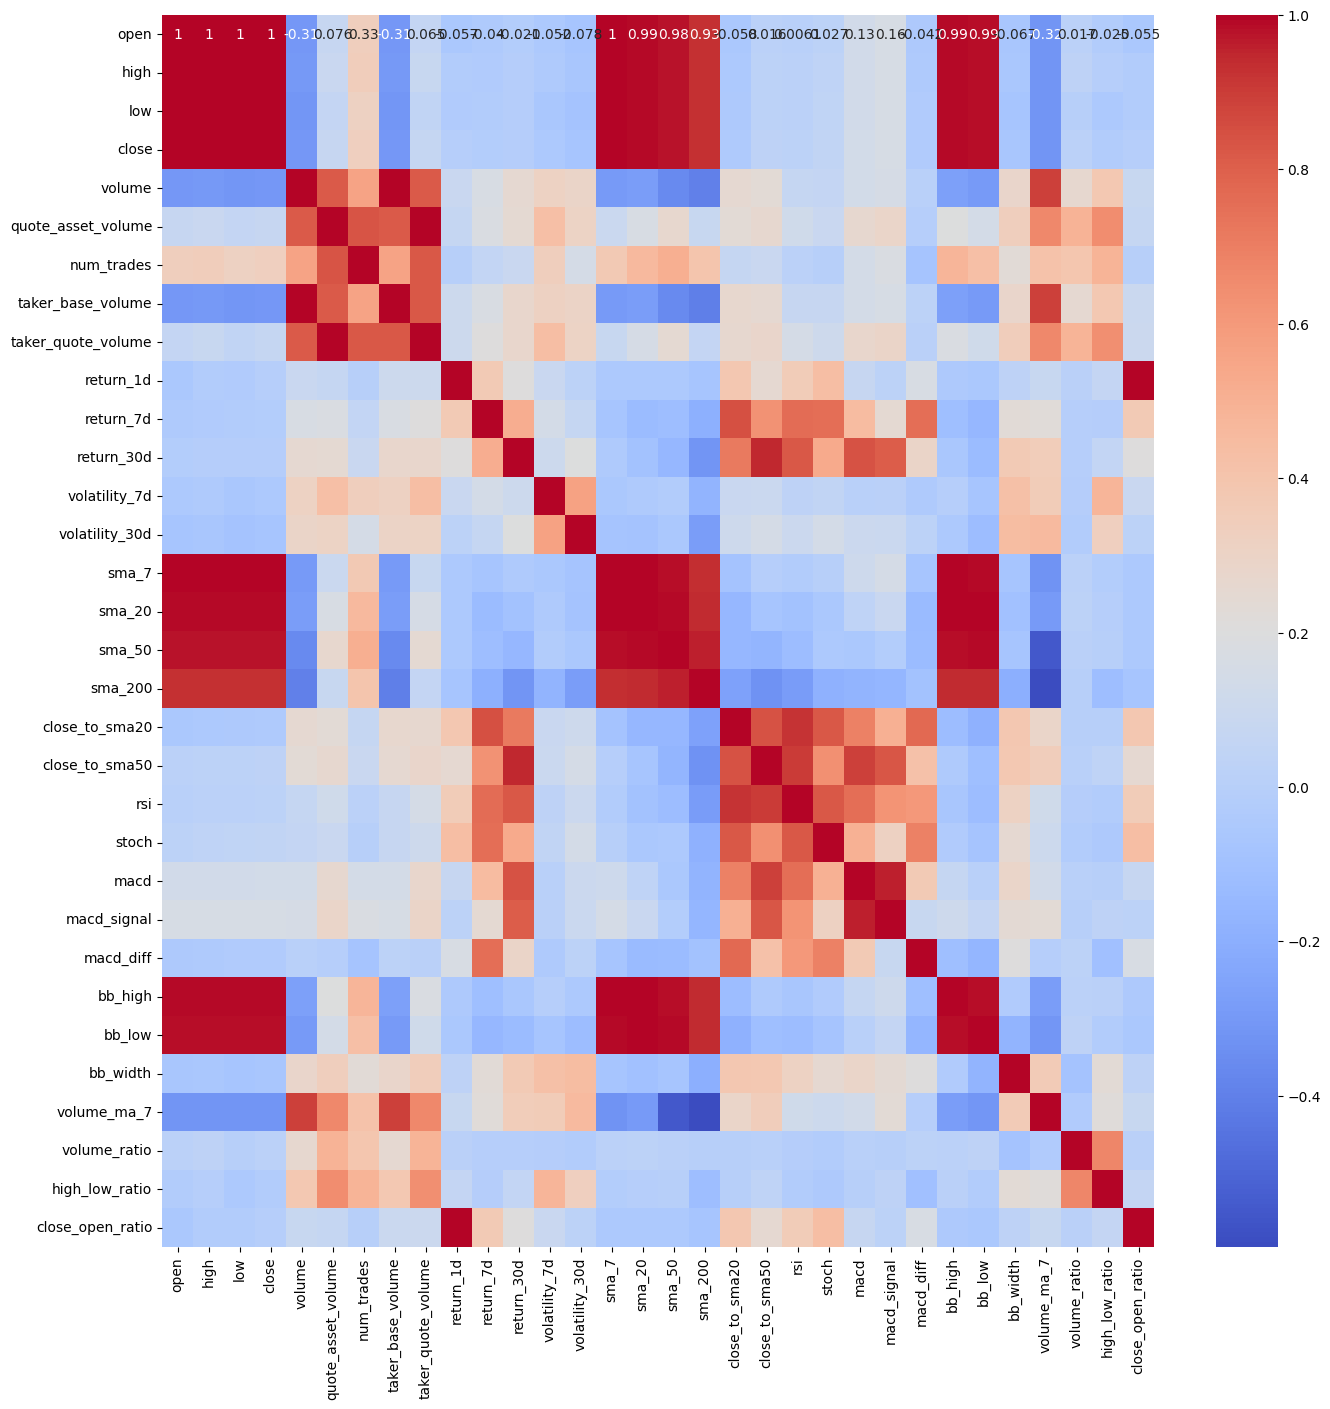

In [9]:
plt.figure(figsize=(16,16))
sns.heatmap(data=correlations, cmap="coolwarm", annot=True)

In [10]:
import sys
sys.path.append('..')

from src.Feature_generator import add_stationary_features
df_test = add_stationary_features(df_features)

In [11]:
correlations = df_test.select_dtypes(include='number').corr()
print(correlations)

                        open      high       low     close    volume  \
open                1.000000  0.999249  0.998962  0.998519 -0.306106   
high                0.999249  1.000000  0.998675  0.999369 -0.300184   
low                 0.998962  0.998675  1.000000  0.999195 -0.312386   
close               0.998519  0.999369  0.999195  1.000000 -0.305133   
volume             -0.306106 -0.300184 -0.312386 -0.305133  1.000000   
quote_asset_volume  0.076398  0.089598  0.059354  0.076924  0.815328   
num_trades          0.334912  0.345044  0.318351  0.332546  0.561650   
taker_base_volume  -0.305070 -0.298681 -0.310818 -0.303312  0.999697   
taker_quote_volume  0.064925  0.079300  0.049307  0.067484  0.818768   
return_1d          -0.056967 -0.028453 -0.029207 -0.006917  0.086712   
return_7d          -0.039574 -0.029715 -0.026999 -0.021725  0.165452   
return_30d         -0.020777 -0.013744 -0.015619 -0.010024  0.252999   
volatility_7d      -0.052185 -0.040425 -0.062857 -0.049399  0.31

<Axes: >

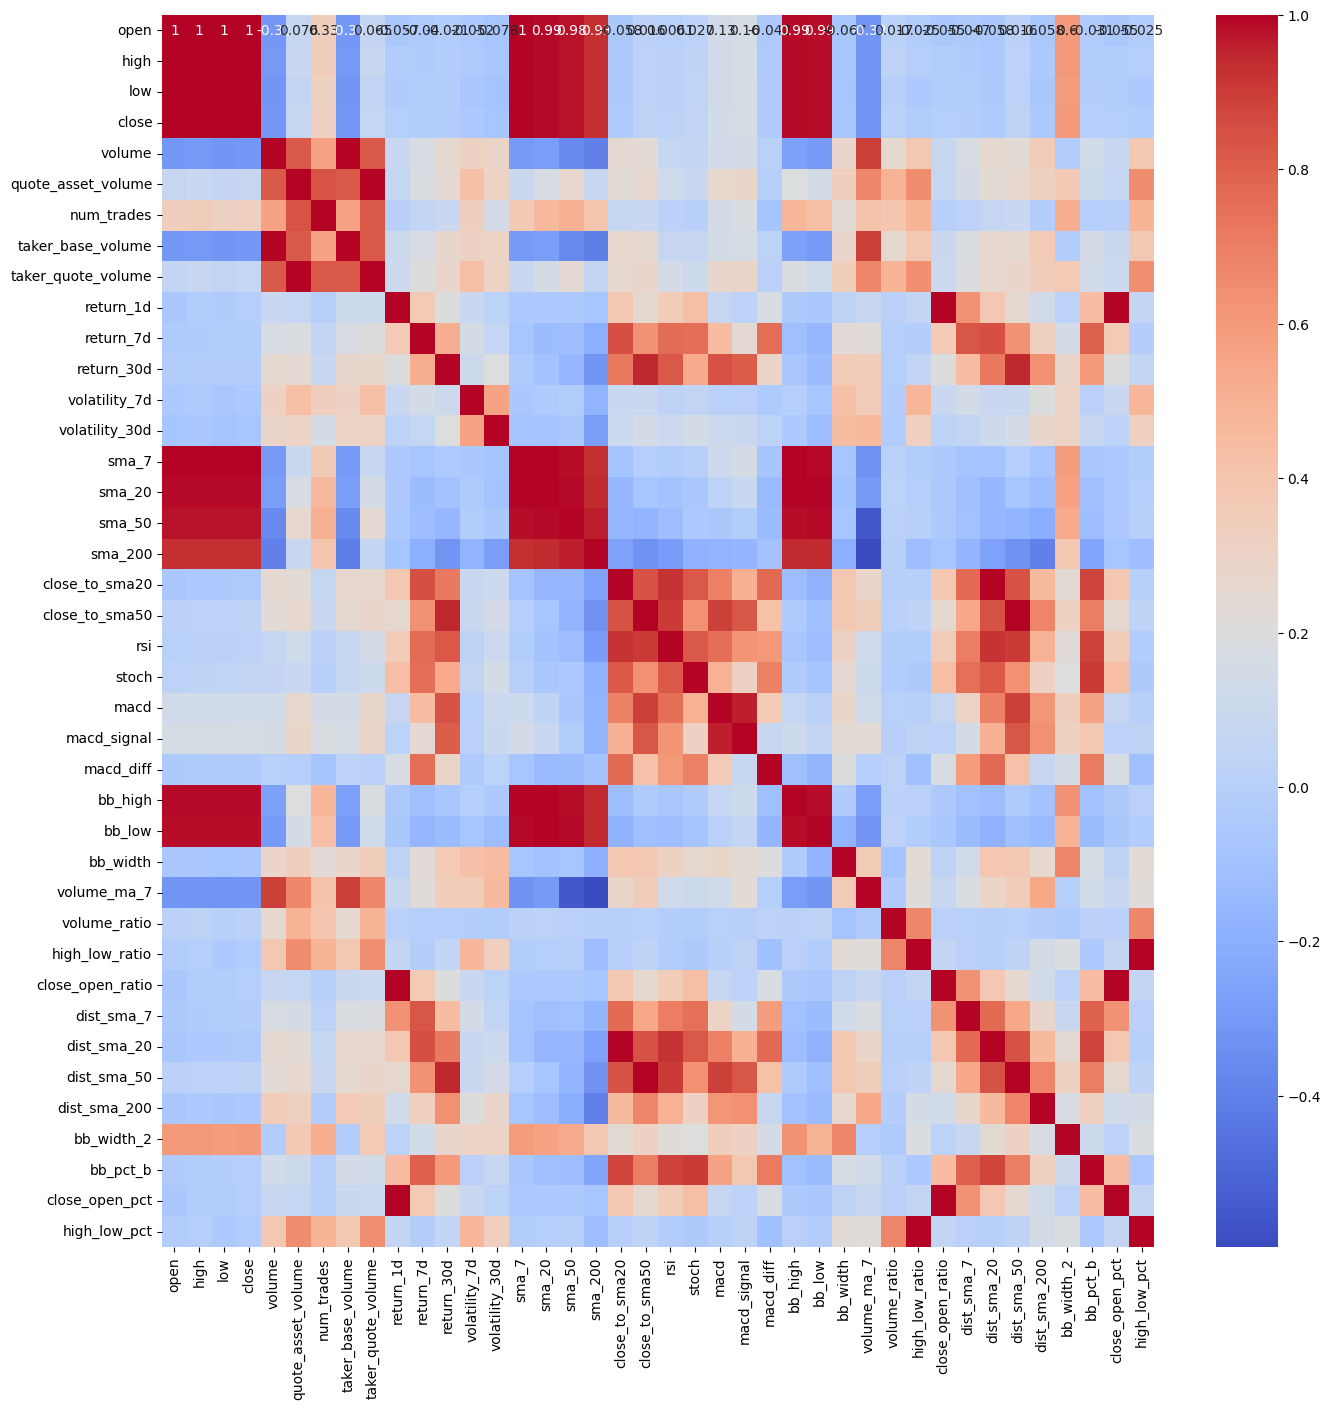

In [12]:
plt.figure(figsize=(16,16))
sns.heatmap(data=correlations, cmap="coolwarm", annot=True)

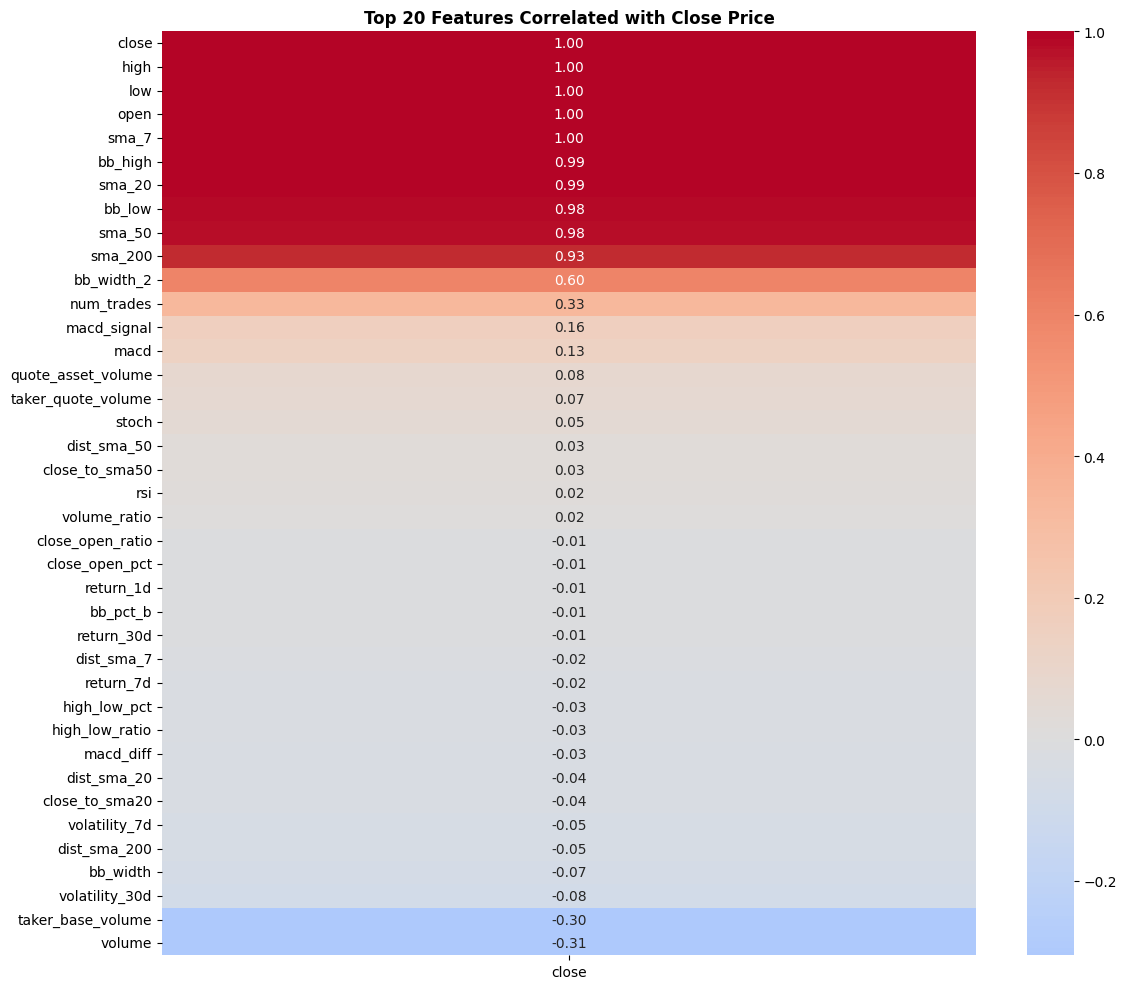

In [13]:
numeric_features = df_test.select_dtypes(include=[np.number]).columns
correlation_matrix = df_test[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['close']].sort_values(by='close', ascending=False).head(39), 
            annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Top 20 Features Correlated with Close Price', fontweight='bold')
plt.tight_layout()
plt.show()

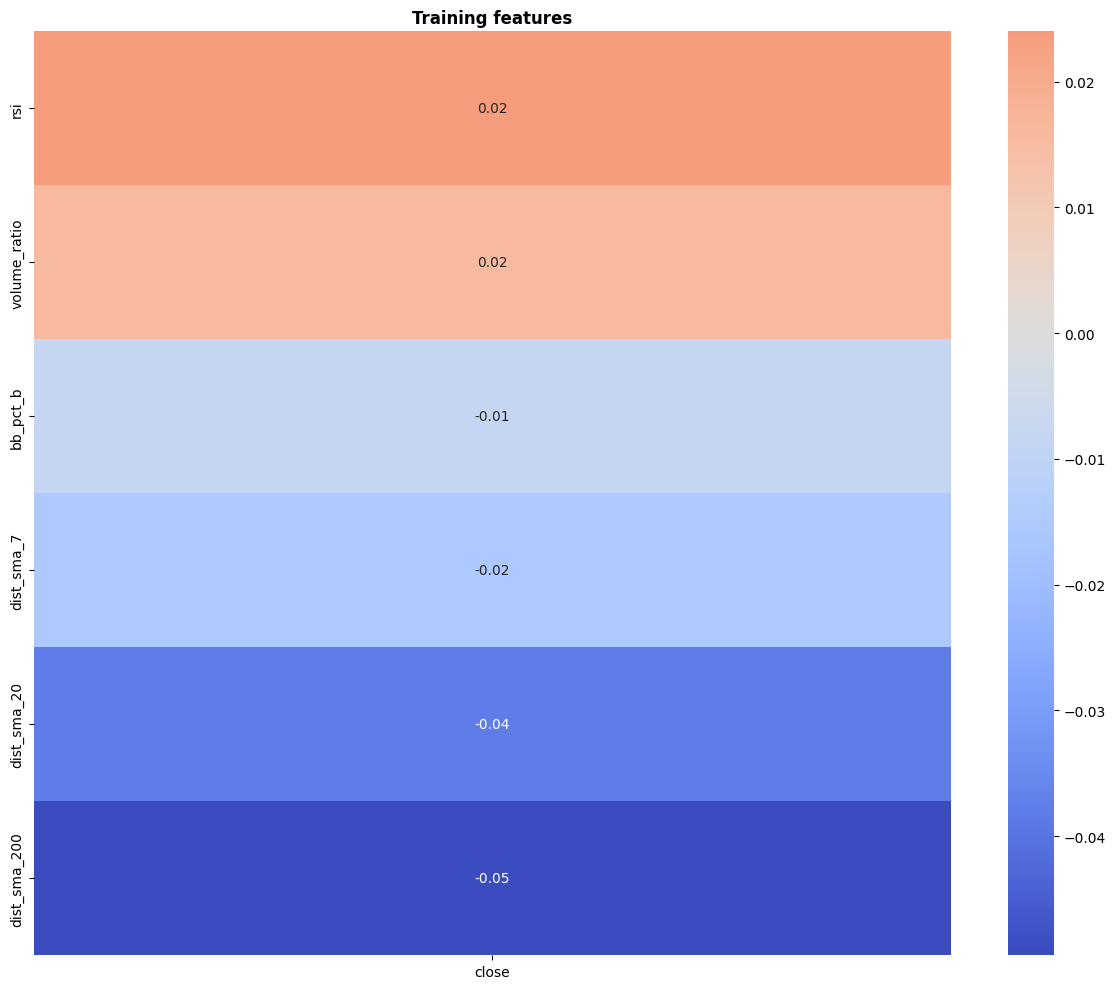

In [14]:
training_features = ['dist_sma_7', 'dist_sma_20', 'dist_sma_200', 'bb_pct_b', 'rsi', 'volume_ratio']

plt.figure(figsize=(12,10))
sns.heatmap(
    correlation_matrix.loc[training_features, ['close']].sort_values(by='close',ascending=False),
    annot=True, fmt='.2f',
    cmap='coolwarm', center=0
)
plt.title('Training features', fontweight='bold')
plt.tight_layout()
plt.show()


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   int64  
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  return_1d           999 non-null    float64
 12  return_7d           993 non-null    float64
 13  return_30d          970 non-null    float64
 14  volatility_7d       993 non-null    float64
 15  volatility_30d      970 non-null    float64
 16  sma_7  

In [16]:
df_features_clean2 = df_features[training_features]
df_features_clean2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dist_sma_7    994 non-null    float64
 1   dist_sma_20   981 non-null    float64
 2   dist_sma_200  801 non-null    float64
 3   bb_pct_b      981 non-null    float64
 4   rsi           987 non-null    float64
 5   volume_ratio  994 non-null    float64
dtypes: float64(6)
memory usage: 47.0 KB


In [17]:
df_features_clean2.to_csv('../data/processed/features.csv', index= False)